## Substitution with smaller Conv-s and ZeroPadding
Substitution presented here is very well described under this link:

[https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolutional_neural_networks.html](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolutional_neural_networks.html)

Each image 160x120x1

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
device_lib.list_local_devices()

[name: "/cpu:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13129036302223186526]

In [3]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
from sklearn.utils import shuffle
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
width, height = 106, 79
train_data_dir = '../kostki/gen_x3_3/train'
test_data_dir = '../kostki/gen_x3_3/test'
nb_train_samples = 47232
nb_test_samples = 11808
epochs = 20
batch_size = 256

input_shape = (width, height, 1)

In [5]:
model = Sequential()
model.add(ZeroPadding2D(padding=(4, 4), name='zeropad1', input_shape=input_shape))
model.add(Conv2D(32, (9, 9), strides=(2, 2), padding='same', name='conv1', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='maxpool1'))

# same as:
# ZeroPadding2D(padding(4, 4))
# Conv2D(64, kernel_size(9, 9), strides=(1, 1), padding='same)
model.add(ZeroPadding2D(padding=(1, 1), name='block1zeropad1'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', name='block1_conv1', activation='relu'))
model.add(ZeroPadding2D(padding=(1, 1), name='block1zeropad2'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', name='block1_conv2', activation='relu'))
model.add(ZeroPadding2D(padding=(1, 1), name='block1zeropad3'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', name='block1_conv3', activation='relu'))
model.add(ZeroPadding2D(padding=(1, 1), name='block1zeropad4'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', name='block1_conv4', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='maxpool2'))

# same as:
# ZeroPadding2D(padding(1, 1))
# model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(1, 1), strides=(1, 1), padding='same', name='block2_conv1', activation='relu'))
model.add(ZeroPadding2D(padding=(1, 1), name='block2zeropad2'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='valid', name='block2_conv2', activation='relu'))
model.add(Conv2D(128, kernel_size=(1, 1), strides=(1, 1), padding='same', name='block2_conv3', activation='relu'))

# same as:
# ZeroPadding2D(padding(1, 1))
# model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(1, 1), strides=(1, 1), padding='same', name='block3_conv1', activation='relu'))
model.add(ZeroPadding2D(padding=(1, 1), name='block3zeropad1'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='valid', name='block3_conv2', activation='relu'))
model.add(Conv2D(128, kernel_size=(1, 1), strides=(1, 1), padding='same', name='block3_conv3', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='maxpool3'))

model.add(Conv2D(128, kernel_size=(4, 4), strides=(3, 3), padding='same', activation='relu'))
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# summarize model and apply checkpoints
print(model.summary())
filepath = 'substituting_160x120/substituting_160x120-{epoch:02d}-{loss:.4f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zeropad1 (ZeroPadding2D)     (None, 114, 87, 1)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 57, 44, 32)        2624      
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 29, 22, 32)        0         
_________________________________________________________________
block1zeropad1 (ZeroPadding2 (None, 31, 24, 32)        0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 31, 24, 64)        18496     
_________________________________________________________________
block1zeropad2 (ZeroPadding2 (None, 33, 26, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 33, 26, 64)        36928     
__________

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.20,
    zoom_range=0.15,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(width, height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    classes=['1', '2', '3', '4', '5', '6'],
    shuffle=True,
    seed=2018)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width, height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    classes=['1', '2', '3', '4', '5', '6'],
    shuffle=True,
    seed=2018)

Found 47232 images belonging to 6 classes.
Found 11808 images belonging to 6 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks_list,
    shuffle=True,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

In [13]:
score = model.evaluate_generator(test_generator)
print("Accuracy: %.2f%%" % (score[1]*100))
print('Test loss:', score[0])
print('Test accuracy', score[1])

Accuracy: 16.67%
Test loss: 1.7917757531814782
Test accuracy 0.16666666666666666


In [14]:
model_json = model.to_json()
with open('substituting_160x120_model.json', 'w') as json_file:
    json_file.write(model_json)
    
model.save_weights('substituting_160x120_weights.h5')
print('Saved model weights')

Saved model weights


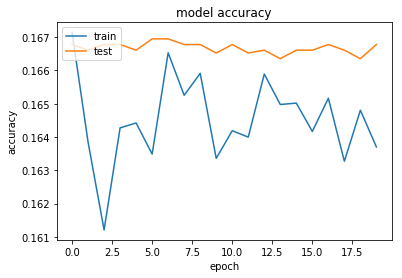

In [15]:
#summarize for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

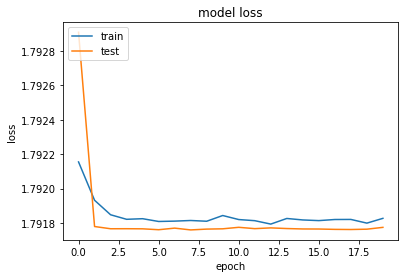

In [16]:
#summarize for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plot_model(model, to_file='substituting_160x120/substituting_160x120_plot.png', show_shapes=True, show_layer_names=True)